In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Load train dataset

In [69]:
data = pd.read_csv("../data/train.csv")

In [70]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into training and dev sets

In [72]:
data

array([[7, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

#### Dev set

In [73]:
data_dev = data[0:1000].T # T for transposing as each column is number features
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # scaling X between 0 and 1

In [74]:
print(X_dev.shape)
X_dev[:10]

(784, 1000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
print(Y_dev.shape)
Y_dev[:10]

(1000,)


array([7, 8, 8, 9, 8, 3, 4, 0, 9, 0])

#### Training set

In [76]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [77]:
print(X_train.shape)
X_train[:10]

(784, 41000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
print(Y_train.shape)
Y_train[:10]

(41000,)


array([3, 1, 0, 1, 2, 0, 2, 4, 2, 4])

### Define our Neural Network

Our NN will have a simple two-layer architecture. Input layer a<sup>[0]</sup> will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  𝑎<sup>[1]</sup>
  will have 10 units with ReLU activation, and finally our output layer  𝑎<sup>[2]</sup>
  will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$Z^{[1]} = W^{[1]}X + b^{[1]}$

$A^{[1]} = g_{ReLU}(Z^{[1]})$

$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$

$A^{[2]} = g_{softmax}(Z^{[2]})$

**Backward propagation**

$dZ^{[2]} = A^{[2]} - Y$

$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

$dB^{[2]} = \frac{1}{m} \Sigma dZ^{[2]}$

$dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot* g^{[1]'}(z^{[1]})$

$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$

$dB^{[1]} = \frac{1}{m} \Sigma dZ^{[1]}$

**Parameter updates**

$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$

$b^{[2]} := b^{[2]} - \alpha db^{[2]}$

$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$

$b^{[1]} := b^{[1]} - \alpha db^{[1]}$

### Vars and shapes

**Forward prop**

- $A^{[0]} = X$: 784 x m

- $Z^{[1]} \sim A^{[1]}$: 10 x m

- $W^{[1]}$: 10 x 784 (as $W^{[1]}A^{[0]} \sim Z^{[1]}$)

- $B^{[1]}$: 10 x 1

- $Z^{[2]} \sim A^{[2]}$: 10 x m

- $W^{[2]}$: 10 x 10 (as $W^{[2]}A^{[1]} \sim Z^{[2]}$)

- $B^{[2]}$: 10 x 1

**Backprop**

- $dZ^{[2]}$: 10 x m ($A^{[2]}$)

- $dW^{[2]}$: 10 x 10

- $dB^{[2]}$: 10 x 1

- $dZ^{[1]}$: 10 x m ($A^{[1]}$)

- $dW^{[1]}$: 10 x 784

- $dB^{[1]}$: 10 x 1

#### Forward Prop

In [79]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [80]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [81]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [82]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#### Backward Prop

In [91]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1 ))
    one_hot_Y[np.arange(Y.size), Y] = 1  # places a 1 in the correct column (representing the class label) for each row (representing a data point).
    one_hot_Y = one_hot_Y.T  # now each row of one_hot_Y corresponds to a class, and each column corresponds to a data point
    return one_hot_Y

In [92]:
def ReLU_deriv(Z):
    return Z > 0  # This will output 1 if Z bigger that zero (relu in positive side of x axis) and 0 if not (remember relu function shape for better intuition)

In [93]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2 * ReLU_deriv(Z1))
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [94]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # our tiny steps down the hill
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [95]:
def get_predictions(A2):
    # return max value afte our softmax
    return np.argmax(A2, 0)

In [96]:
def get_accuracy(predictions, Y):
    # For printing accuracy of model through iterations
    print(predictions, Y) #pring model output Ys and Y_hat (real Ys)
    return np.sum(predictions == Y) / Y.size

In [97]:
def gradient_descent(X, Y, iterations, alpha):
    # Walking Down The Hill
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0): # printing model results every 10th iteration
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y), "\n")
    return W1, b1, W2, b2

#### Let's Train

In [98]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.10)

Iteration:  0
[3 3 2 ... 2 2 3] [3 1 0 ... 1 4 8]
Accuracy:  0.14790243902439024 

Iteration:  10
[3 0 6 ... 7 6 8] [3 1 0 ... 1 4 8]
Accuracy:  0.19378048780487805 

Iteration:  20
[3 0 6 ... 8 6 8] [3 1 0 ... 1 4 8]
Accuracy:  0.23917073170731706 

Iteration:  30
[3 0 6 ... 8 6 8] [3 1 0 ... 1 4 8]
Accuracy:  0.2859024390243902 

Iteration:  40
[3 6 5 ... 8 6 8] [3 1 0 ... 1 4 8]
Accuracy:  0.33363414634146343 

Iteration:  50
[5 7 5 ... 8 4 8] [3 1 0 ... 1 4 8]
Accuracy:  0.38878048780487806 

Iteration:  60
[5 7 5 ... 1 4 8] [3 1 0 ... 1 4 8]
Accuracy:  0.4245853658536585 

Iteration:  70
[5 7 5 ... 1 4 8] [3 1 0 ... 1 4 8]
Accuracy:  0.44995121951219513 

Iteration:  80
[5 7 5 ... 1 4 8] [3 1 0 ... 1 4 8]
Accuracy:  0.4698292682926829 

Iteration:  90
[5 7 5 ... 1 4 1] [3 1 0 ... 1 4 8]
Accuracy:  0.4901463414634146 

Iteration:  100
[5 7 5 ... 1 4 1] [3 1 0 ... 1 4 8]
Accuracy:  0.5118292682926829 

Iteration:  110
[5 7 0 ... 1 4 1] [3 1 0 ... 1 4 8]
Accuracy:  0.5331219512195122

*with 1000 iterations the model accuracy is about 80 percent (82.5)* \
ps: my neural network architecture could be more complex with more layers and neurons (right now my model is high bias compare to state of the art handwritten digit recognition neural networks) \
or even using CNN, vision-transformers and etc but I wanted to build a neural network from scratch with raw algebra and math for educational purposes and gain better intuition about neural networks

### Test the model on dev set

In [99]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [100]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 1 8 9 5 5 9 0 9 0 7 1 8 4 5 9 6 2 9 8 9 7 6 5 1 4 6 0 2 2 1 2 1 9 5 8 3
 1 9 7 0 6 3 9 7 4 7 6 1 1 9 7 2 5 4 8 8 6 3 4 9 1 1 7 2 4 0 9 2 1 5 9 4 3
 8 3 6 1 7 1 1 2 7 4 6 3 9 6 7 7 1 8 5 1 9 8 0 8 2 3 7 3 0 4 2 1 3 2 9 4 3
 6 7 8 6 6 1 4 3 7 1 1 1 1 6 4 5 4 7 5 3 2 4 7 9 7 9 9 7 4 2 0 8 5 6 6 3 7
 8 1 9 5 4 2 8 7 7 8 8 1 1 1 7 2 3 8 5 0 6 6 9 1 0 7 0 9 2 1 2 2 7 0 9 3 5
 3 5 1 2 4 1 8 3 6 0 3 3 6 8 6 0 9 1 4 0 2 3 0 7 5 8 1 4 6 9 9 0 4 3 0 3 4
 0 1 3 2 0 5 9 8 3 6 4 6 6 7 1 7 7 9 1 7 9 6 8 0 0 9 1 2 8 7 1 4 1 8 1 1 1
 9 0 0 7 1 0 2 1 7 6 2 6 1 0 6 9 2 8 5 4 8 1 7 5 4 3 2 1 7 6 3 1 8 3 7 6 1
 5 1 0 2 4 5 6 4 6 9 7 8 1 3 0 1 9 6 8 7 0 3 3 6 2 6 2 1 2 1 0 6 3 7 4 9 5
 3 6 9 6 6 1 9 9 3 5 0 9 3 8 0 1 7 0 3 7 0 8 4 5 9 3 6 9 1 0 3 2 3 7 1 7 2
 4 9 4 1 9 5 1 5 3 9 6 2 7 9 0 2 2 9 5 0 8 3 4 3 6 1 6 0 9 7 7 2 2 1 2 2 0
 1 2 3 8 5 0 7 2 5 7 7 9 4 7 0 8 4 2 8 7 2 8 6 3 9 1 9 5 9 3 4 6 6 3 7 2 8
 7 2 6 5 9 6 8 3 4 3 5 7 9 0 3 4 7 4 9 1 7 2 3 8 1 3 0 0 8 4 3 1 3 7 9 0 7
 7 9 0 3 0 6 1 8 7 4 2 2 

0.773

*got 82.9 percent on dev set* \
This number (+0.4 percent) show a well balanced model in Bias-Variance trade-off

### Look at some example

In [101]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show

Prediction:  [3]
label:  2


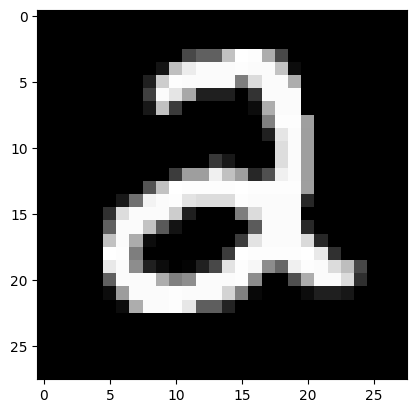

In [125]:
test_prediction(41, W1, b1, W2, b2)

### Loading the test set

In [45]:
test_data = pd.read_csv("../data/test.csv")

In [46]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test_data = np.array(test_data)
m_test, n_test = test_data.shape
print(test_data.shape)

(28000, 784)


#### pre-process test set

In [53]:
test_data = test_data.T # T for transposing as each column is number features
Y_test = test_data[0]
X_test = test_data[1:n]
X_test = X_test / 255. # scaling X between 0 and 1

In [55]:
print(X_test.shape)
X_test[:10]

(783, 28000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
print(Y_test.shape)
Y_test[:10]

(28000,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])